# KNN on Credit Card Fraud Detection Dataset


**Task 1.** Propose a suitable error metrics for this problem. 

**Task 2.** Apply KNN on the dataset, find out the best k using grid search.

**Task 3.** Report the value of performance

**Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not**

**Information about data set**

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [36]:
data = pd.read_csv("creditcard.csv")

In [38]:
data.shape

(284807, 31)

In [40]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [41]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [42]:
#taking first 20000 samples
data_20000 = data[:20000]

In [43]:
data_20000.shape

(20000, 31)

In [44]:
data_20000["Class"].value_counts()

0    19915
1       85
Name: Class, dtype: int64

**Our dataset is heavily imbalanced**

In [45]:
data20000 = data_20000.drop(['Class'], axis=1)
data20000.shape

(20000, 30)

In [46]:
data20000_labels = data_20000["Class"]
data20000_labels.shape

(20000,)

In [47]:
data20000_Std = StandardScaler().fit_transform(data20000)
print(data20000_Std.shape)
print(type(data20000_Std))

(20000, 30)
<class 'numpy.ndarray'>


### Task1: Propose a suitable error metrics for this problem.

**Since our dataset is heavily imbalanced therefore I am proposing "Recall" as a suitable error metric for our problem**

### Task 2:  Apply KNN on the dataset, find out the best k using 5-Folds CV.

In [48]:
X1 = data20000_Std[0:16000]
XTest = data20000_Std[16000:20000]
Y1 = data20000_labels[0:16000]
YTest = data20000_labels[16000:20000]
#taking last 4k points as test data and first 16k points as train data

myList = list(range(0,50))
neighbors = list(filter(lambda x: x%2!=0, myList))  #This will give a list of odd numbers only ranging from 0 to 50

CV_Scores = []

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    scores = cross_val_score(KNN, X1, Y1, cv = 5, scoring='recall')
    CV_Scores.append(scores.mean())

In [49]:
CV_Scores

[0.7952380952380952,
 0.659047619047619,
 0.5466666666666666,
 0.5180952380952382,
 0.5038095238095238,
 0.4780952380952381,
 0.4780952380952381,
 0.4923809523809524,
 0.46571428571428564,
 0.4390476190476191,
 0.41238095238095235,
 0.39904761904761904,
 0.5580952380952381,
 0.518095238095238,
 0.5047619047619047,
 0.4514285714285714,
 0.41142857142857137,
 0.41142857142857137,
 0.3980952380952381,
 0.3980952380952381,
 0.3980952380952381,
 0.4247619047619048,
 0.5314285714285715,
 0.5314285714285715,
 0.5180952380952382]

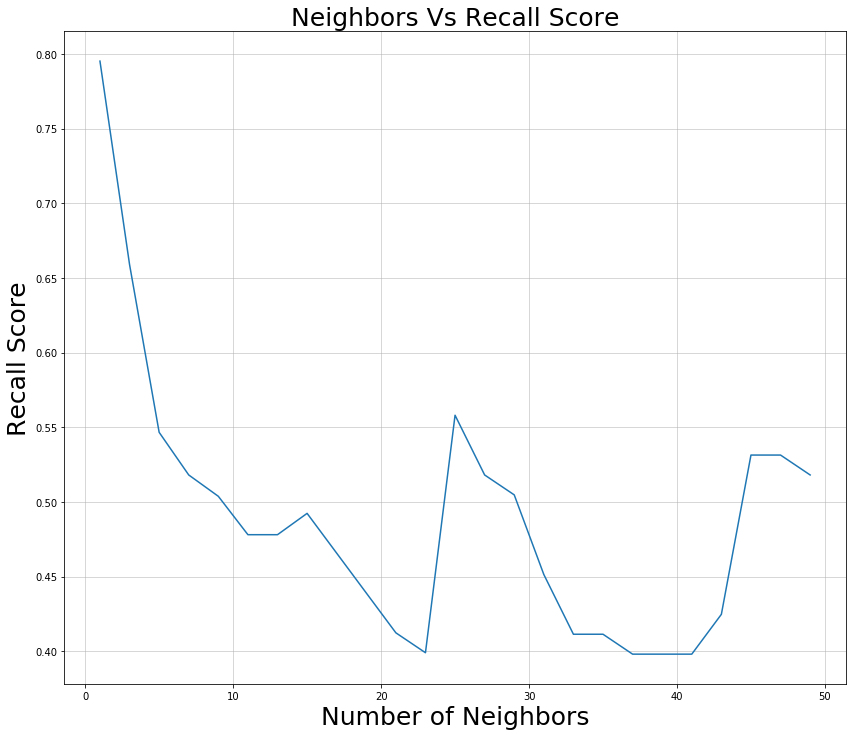

In [50]:
plt.figure(figsize = (14, 12))
plt.plot(neighbors, CV_Scores)
plt.title("Neighbors Vs Recall Score", fontsize=25)
plt.xlabel("Number of Neighbors", fontsize=25)
plt.ylabel("Recall Score", fontsize=25)
plt.grid(linestyle='-', linewidth=0.5)

In [51]:
best_k = neighbors[CV_Scores.index(max(CV_Scores))]
best_k

1

**Best 'K' value is chosen as 1**

In [52]:
from sklearn.metrics import recall_score

KNN_best = KNeighborsClassifier(n_neighbors = best_k, algorithm = 'kd_tree')

KNN_best.fit(X1, Y1)

prediction = KNN_best.predict(XTest)

recallTest = recall_score(YTest, prediction)

print("Recall Score of the knn classifier for best k values of "+str(best_k)+" is: "+str(recallTest))

cm = confusion_matrix(YTest, prediction)

print(cm)

tn, fp, fn, tp = cm.ravel()

(tn, fp, fn, tp)

Recall Score of the knn classifier for best k values of 1 is: 0.8333333333333334
[[3978   10]
 [   2   10]]


(3978, 10, 2, 10)

In [53]:
YTest.value_counts()

0    3988
1      12
Name: Class, dtype: int64

**There are total 4000 points in our test dataset, out of which 3988 points belongs to class label '0' and 12 points belong to class label '1'. Now from confusion matrix we can see that the value of "True Negative" is 3978 which means that out of 3988 points which belong to class '0', 3978 points are predicted as '0'. Furthermore, from the same confusion matrix we can see that the value of "True Positive" is 10 which means that out of 12 points which belong to class '1', 10 points are detected as '1'. 10 point from class '0' and 2 points from class '1' are detected falsely**

**In conclusion, despite being an imbalanced dataset, our model is performing well. Even thought, there are only 12 points out of 4000 belongs to class '1', still our model is able to detect 10 of them correctly.**

### Task 3: Report the value of performance

In [54]:
# Calculating R square value of our model
from sklearn.metrics import r2_score

print("Recall Score of the knn classifier for best k values of "+str(best_k)+" is: "+str(recallTest))

Recall Score of the knn classifier for best k values of 1 is: 0.8333333333333334
